In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

In [3]:
from problem import get_train_data

data_train, labels_train = get_train_data()

In [4]:
from problem import get_test_data

data_test, labels_test = get_test_data()

In [5]:
df = data_train.copy()
df['target'] = labels_train

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Beta'],model='additive',period=1)

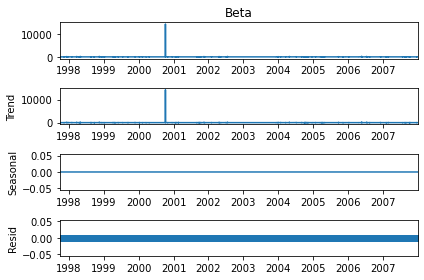

In [9]:
result.plot()
plt.show()

In [51]:
result.trend

1997-10-01 00:00:00     7.641340
1997-10-01 00:10:00     9.149856
1997-10-01 00:20:00    11.924199
1997-10-01 00:30:00    16.032987
1997-10-01 00:40:00    10.253789
                         ...    
2007-12-31 23:10:00     1.304273
2007-12-31 23:20:00     0.982693
2007-12-31 23:30:00     0.989657
2007-12-31 23:40:00     0.958408
2007-12-31 23:50:00     0.912270
Name: trend, Length: 509834, dtype: float64

### diff features
This is the easiest method and involves calculating the difference between consecutive elements. It stabilizes the mean and reduces the impact of trends and seasonal behavior, leaving the model free to focus on predicting one point after another.

Click here for more informations : https://h2o.ai/blog/an-introduction-to-time-series-modeling-time-series-preprocessing-and-feature-engineering/

In [7]:
df['Beta_diff'] = df['Beta'].diff(periods=144)
df['RmsBob_diff'] = df['RmsBob'].diff(periods=144)
df['Range F 1_diff'] = df['Range F 1'].diff(periods=144)
df['Range F 4_diff'] = df['Range F 4'].diff(periods=144)
df['Range F 13_diff'] = df['Range F 13'].diff(periods=144)

df['Beta_diff_1'] = df['Beta'].diff(periods=1)
df['RmsBob_diff_1'] = df['RmsBob'].diff(periods=1)
df['Range F 1_diff_1'] = df['Range F 1'].diff(periods=1)
df['Range F 4_diff_1'] = df['Range F 4'].diff(periods=1)
df['Range F 13_diff_1'] = df['Range F 13'].diff(periods=1)

### shift features

In [8]:
df['Beta_d-1'] = df['Beta'].shift(144)
df['Pdyn_d-1'] = df['Pdyn'].shift(144)
df['Vx_d-1'] = df['Vx'].shift(144)

df['Beta_t-1'] = df['Beta'].shift(1)
df['RmsBob_t-1'] = df['RmsBob'].shift(1)
df['Vx_t-1'] = df['Vx'].shift(1)

df['Vx_m-1'] = df['Vx'].shift(144*30)

### freq_fourier features

In [9]:
# Obtain the frequencies
df['freq_fourier'] = np.fft.fftfreq(df.shape[0])

### rolling_windows features

In [10]:
df['Beta_rw2h_mean'] = df['Beta'].rolling('2h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw1h_mean'] = df['Beta'].rolling('1h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw12h_mean'] = df['Beta'].rolling('12h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw1h_std'] = df['Beta'].rolling('1h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw2h_std'] = df['Beta'].rolling('2h', center=False).std().ffill().bfill().astype(df['Beta'].dtype)
df['Beta_rw24h_mean'] = df['Beta'].rolling('24h', center=False).mean().ffill().bfill().astype(df['Beta'].dtype)



df['RmsBob_rw12h_mean'] = df['RmsBob'].rolling('12h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw2h_mean'] = df['RmsBob'].rolling('2h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw24h_mean'] = df['RmsBob'].rolling('24h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw12h_std'] = df['RmsBob'].rolling('12h', center=False).std().ffill().bfill().astype(df['RmsBob'].dtype)
df['RmsBob_rw1h_mean'] = df['RmsBob'].rolling('1h', center=False).mean().ffill().bfill().astype(df['RmsBob'].dtype)

df['B_rw24h_mean'] = df['B'].rolling('24h', center=False).mean().ffill().bfill().astype(df['B'].dtype)
df['B_rw24h_std'] = df['B'].rolling('24h', center=False).std().ffill().bfill().astype(df['B'].dtype)
df['B_rw12h_mean'] = df['B'].rolling('12h', center=False).mean().ffill().bfill().astype(df['B'].dtype)

df['Range F 7_rw1w_std'] = df['Range F 7'].rolling('168h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)
df['Range F 7_rw24h_std'] = df['Range F 7'].rolling('24h', center=False).std().ffill().bfill().astype(df['Range F 7'].dtype)


### time features

In [11]:
df['hour'] = df.index.hour
df['dayofyear'] = df.index.day_of_year
df['month'] = df.index.month
df['year'] = df.index.year
df['week'] = df.index.week
df['dayofweek'] = df.index.dayofweek

## Final dataset

In [15]:
final_cols = ['Beta_rw2h_mean', 'Beta','Beta_rw1h_mean','Beta_rw12h_mean','RmsBob_rw12h_mean','Beta_rw1h_std','RmsBob_rw2h_mean'
              ,'Beta_rw2h_std','B_rw24h_mean','B_rw24h_std','B_rw12h_mean','RmsBob_rw24h_mean','Vx','Range F 7_rw1w_std',
              'Beta_rw24h_mean','RmsBob_rw12h_std','RmsBob_rw1h_mean','Range F 7_rw24h_std','Range F 4','Beta_t-1',
              'RmsBob_t-1','Pdyn_d-1','Pdyn','Vx_d-1','Vx_t-1','Vx_m-1','Range F 4_diff','Range F 1_diff','Beta_diff',
              'Range F 13_diff','RmsBob_diff','Beta_d-1','Range F 1','Range F 9','Vth','Vy','V','dayofyear','week','year',
              'dayofweek','month','hour','freq_fourier','target']

In [35]:
final_df = df.copy()
final_df = final_df[final_cols]

In [7]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


# Séparer les données en X et y
X = df.drop(columns=['target'], axis=1).fillna(0)
y = df['target']
#X2 = X.fillna(0)
# Perform clustering to create balanced subsets
kmeans = KMeans(n_clusters=2, max_iter = 20)
#cluster_labels = kmeans.fit_predict(X)

In [ ]:
kmeans.fit(X)

In [ ]:
# Train base classifiers on each balanced subset
base_classifiers = []
for i in range(10):
    X_cluster = X[cluster_labels == i]
    y_cluster = y[cluster_labels == i]
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.3)
    clf = LogisticRegression()
    model = make_pipeline(StandardScaler(), clf)
    model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy of base classifier {}: {}'.format(i, accuracy_score(y_test, y_pred)))
    base_classifiers.append(clf)

# Implement self-paced learning to select a subset of base classifiers
selected_classifiers = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
while len(selected_classifiers) < 5:
    scores = []
    for clf in base_classifiers:
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    scores = np.array(scores)
    indices = np.argsort(scores)[::-1]
    selected_indices = indices[:len(selected_classifiers)+1]
    selected_classifiers = [base_classifiers[i] for i in selected_indices]

# Combine selected base classifiers into an ensemble classifier
def ensemble_predict(X):
    y_preds = []
    for clf in selected_classifiers:
        y_pred = clf.predict(X)
        y_preds.append(y_pred)
    y_preds = np.array(y_preds)
    y_ensemble = np.mean(y_preds, axis=0)
    return y_ensemble

y_pred = ensemble_predict(X_test)
print('Accuracy of ensemble classifier: {}'.format(accuracy_score(y_test, y_pred)))


In [21]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Séparer les données en X et y
X = final_df.drop(columns=['target'], axis=1)
y = final_df['target']
X2 = X.fillna(0)

# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tqdm(tscv.split(X2)):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    classifier = RandomForestClassifier(max_depth=100, random_state=42)#LogisticRegression()
    model = make_pipeline(StandardScaler(), classifier)

    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0it [00:00, ?it/s]

0.8733229769806524


1it [01:20, 80.84s/it]

0.29671628453108295
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     71206
           1       0.86      0.26      0.40     13766

    accuracy                           0.87     84972
   macro avg       0.87      0.63      0.66     84972
weighted avg       0.87      0.87      0.84     84972

The balanced accuracy of the default model is 0.626
0.8776067410441086


2it [04:23, 140.99s/it]

0.2995228620581445
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     69883
           1       0.71      0.53      0.61     15089

    accuracy                           0.88     84972
   macro avg       0.80      0.74      0.77     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.743
0.939109353669444


3it [09:05, 205.06s/it]

0.16962868825282768
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     77546
           1       0.78      0.42      0.55      7426

    accuracy                           0.94     84972
   macro avg       0.87      0.70      0.76     84972
weighted avg       0.93      0.94      0.93     84972

The balanced accuracy of the default model is 0.704
0.9549380972555666


4it [15:25, 274.18s/it]

0.1347021609671843
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     77756
           1       0.79      0.63      0.70      7216

    accuracy                           0.95     84972
   macro avg       0.88      0.81      0.84     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.809
0.9738149037329944


5it [23:40, 284.07s/it]

0.08344491022864237
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81981
           1       0.81      0.34      0.47      2991

    accuracy                           0.97     84972
   macro avg       0.89      0.67      0.73     84972
weighted avg       0.97      0.97      0.97     84972

The balanced accuracy of the default model is 0.667


In [22]:
def rf_features_importance(model, cols):
    '''
    Plot feature_importance from a random forest model

    Input:
    model (MODEL_TYPE) : Model for which to compute the feature importance
    cols (list) : input DataFrame with true labels

    Output:
    None
    '''
    # get feature importance from model
    importances = model.feature_importances_
    forest_importances = pd.Series(importances, index=cols).sort_values(ascending=False)
    # plot results
    fig, ax = plt.subplots(figsize=(12, 5))
    forest_importances.plot.bar(ax=ax)
    ax.set_title("Feature importances")
    fig.tight_layout()

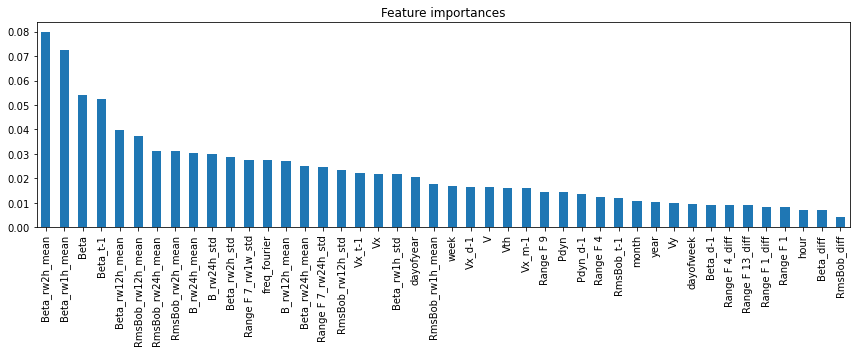

In [23]:
rf_features_importance(classifier, cols=X_train.columns)

In [27]:
cols_to_drop = ['target','month','year','Vy','dayofweek', 'Beta_d-1','Range F 4_diff','Range F 13_diff','Range F 1_diff', 'Range F 1','hour','Beta_diff','RmsBob_diff']

In [29]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

X = final_df.drop(columns=cols_to_drop, axis=1)
y = final_df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.856011391987949
0.5005842652418828
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     71206
           1       0.88      0.13      0.22     13766

    accuracy                           0.86     84972
   macro avg       0.87      0.56      0.57     84972
weighted avg       0.86      0.86      0.81     84972

The balanced accuracy of the default model is 0.563
0.8728640022595678
0.346519265350287
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     69883
           1       0.75      0.43      0.54     15089

    accuracy                           0.87     84972
   macro avg       0.82      0.70      0.73     84972
weighted avg       0.86      0.87      0.86     84972

The balanced accuracy of the default model is 0.698
0.9381560984794991
0.15567391748548448
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     77546
           1       0

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

X = final_df.drop(columns=cols_to_drop, axis=1)
y = final_df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.86315492162124
0.4739507230865418
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     71206
           1       0.89      0.18      0.30     13766

    accuracy                           0.86     84972
   macro avg       0.87      0.59      0.61     84972
weighted avg       0.87      0.86      0.82     84972

The balanced accuracy of the default model is 0.587
0.8740290919361672
0.35033824763322435
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     69883
           1       0.80      0.39      0.52     15089

    accuracy                           0.87     84972
   macro avg       0.84      0.68      0.73     84972
weighted avg       0.87      0.87      0.86     84972

The balanced accuracy of the default model is 0.684
0.938991667843525
0.15366550553607206
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     77546
           1       0

In [32]:
df = data_train.copy()
df['target'] = labels_train
df.shape

(509834, 34)

In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8851268653203408
0.28725729516608145
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     71206
           1       0.70      0.52      0.59     13766

    accuracy                           0.89     84972
   macro avg       0.80      0.74      0.76     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.736
0.8624605752483171
0.3438494831791435
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.67      0.45      0.54     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.70      0.73     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.699
0.9313773949065575
0.18612147209597016
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1     

In [16]:
from sklearn.model_selection import GridSearchCV
X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
#parameters to tune
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    #'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

classifier = LogisticRegression()
model = make_pipeline(StandardScaler(), classifier)

'''n_jobs=5, 
cv=5, scoring=’f1_micro’,
verbose=2, refit=True'''
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=classifier, cv=tscv,
                        param_grid=param_grid, scoring=['f1'], refit=False, verbose=2, n_jobs=5)
gsearch.fit(X2, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


KeyboardInterrupt: 

In [48]:
from sklearn.metrics import log_loss, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
#parameters to tune
param_grid = [    
    {'penalty' : ['l2'], #l2
    #'C' : np.logspace(-4, 4, 20),
    'solver' : ['sag','saga'],
    'max_iter' : [1000] #1000
    }
]

classifier = LogisticRegression()
model = make_pipeline(StandardScaler(), classifier)

logloss_score = make_scorer(log_loss)
f1_score_score = make_scorer(f1_score)

'''n_jobs=5, 
cv=5, scoring=’f1_micro’,
verbose=2, refit=True'''
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=classifier, cv=tscv,
                        param_grid=param_grid, scoring={'log_loss':logloss_score,'f1':f1_score_score}, refit=False, verbose=2, n_jobs=5)
gsearch.fit(X2, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pie

[CV] END ..............max_iter=1000, penalty=l2, solver=sag; total time= 8.3min


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..............max_iter=1000, penalty=l2, solver=sag; total time=10.1min
[CV] END ..............max_iter=1000, penalty=l2, solver=sag; total time= 4.0min
[CV] END .............max_iter=1000, penalty=l2, solver=saga; total time= 6.1min


/Users/pierreloviton/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LogisticRegression(), n_jobs=5,
             param_grid=[{'max_iter': [1000], 'penalty': ['l2'],
                          'solver': ['sag', 'saga']}],
             refit=False,
             scoring={'f1': make_scorer(f1_score),
                      'log_loss': make_scorer(log_loss)},
             verbose=2)

In [49]:
gsearch.cv_results_['rank_test_log_loss']

array([1, 2], dtype=int32)

In [50]:
gsearch.cv_results_['rank_test_f1']

array([1, 2], dtype=int32)

[CV] END ..............max_iter=1000, penalty=l2, solver=sag; total time= 6.2min
[CV] END .............max_iter=1000, penalty=l2, solver=saga; total time= 7.6min
[CV] END ..............max_iter=1000, penalty=l2, solver=sag; total time= 2.0min
[CV] END .............max_iter=1000, penalty=l2, solver=saga; total time= 2.1min
[CV] END .............max_iter=1000, penalty=l2, solver=saga; total time= 4.2min
[CV] END .............max_iter=1000, penalty=l2, solver=saga; total time= 9.5min


In [34]:
gsearch.cv_results_['params'][1]

{'max_iter': 100, 'penalty': 'l2'}

In [35]:
gsearch.cv_results_['params'][5]

{'max_iter': 1000, 'penalty': 'l2'}

In [36]:
gsearch.cv_results_['params'][9]

{'max_iter': 2500, 'penalty': 'l2'}

In [37]:
gsearch.cv_results_['params'][13]

{'max_iter': 5000, 'penalty': 'l2'}

In [ ]:
from sklearn.model_selection import GridSearchCV
X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
#parameters to tune
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

classifier = MLPClassifier()
model = make_pipeline(StandardScaler(), classifier)

'''n_jobs=5, 
cv=5, scoring=’f1_micro’,
verbose=2, refit=True'''
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=classifier, cv=tscv,
                        param_grid=param_grid, scoring=['f1'], refit=False, verbose=2, n_jobs=5)
gsearch.fit(X2, y)

In [11]:
df.shape

(509834, 74)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm


names = [
    "Nearest Neighbors",
    "Logistic Regression"
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "HistGradientBoostingClassifier"
]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    HistGradientBoostingClassifier()
]

X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)


i=0
for classifier in classifiers:
    print("\n\n\n-------------", names[i],'-------------')
    
    # Boucle sur les plis
    for train_index, test_index in tqdm(tscv.split(X2)):
        X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))

        # Entrainer un modèle sur le jeu d'entraînement

        model =make_pipeline(StandardScaler(), classifier)

        #model.set_params(class_weight='balanced_subsample')

        model.fit(X_train, y_train)#, sample_weight=0.3)

        # Prédire sur le jeu de test
        y_pred = model.predict(X_test)

        # Afficher la précision
        print(accuracy_score(y_test, y_pred))
        print(log_loss(y_test, model.predict_proba(X_test)))
        print(classification_report(y_test, y_pred))
        print(f"The balanced accuracy of the default model is "
              f"{balanced_accuracy_score(y_test, y_pred):.3f}")
        i+=1

0it [00:00, ?it/s]




------------- Nearest Neighbors -------------
0.8587770088970484


1it [00:44, 44.89s/it]

4.307067612665758
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     71206
           1       0.64      0.30      0.41     13766

    accuracy                           0.86     84972
   macro avg       0.76      0.63      0.66     84972
weighted avg       0.84      0.86      0.84     84972

The balanced accuracy of the default model is 0.634
0.8217648166454832


2it [02:04, 65.49s/it]

5.191404860902615
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     69883
           1       0.50      0.33      0.40     15089

    accuracy                           0.82     84972
   macro avg       0.68      0.63      0.65     84972
weighted avg       0.80      0.82      0.81     84972

The balanced accuracy of the default model is 0.630
0.9114296474132656


3it [03:52, 84.84s/it]

2.5128155159049896
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     77546
           1       0.49      0.26      0.34      7426

    accuracy                           0.91     84972
   macro avg       0.71      0.62      0.64     84972
weighted avg       0.89      0.91      0.90     84972

The balanced accuracy of the default model is 0.615
0.9016381866967942


4it [06:13, 106.77s/it]

2.7550379760683206
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     77756
           1       0.41      0.39      0.40      7216

    accuracy                           0.90     84972
   macro avg       0.68      0.67      0.67     84972
weighted avg       0.90      0.90      0.90     84972

The balanced accuracy of the default model is 0.668
0.9503365814621287


5it [09:20, 112.02s/it]
0it [00:00, ?it/s]

1.3942750459239275
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     81981
           1       0.25      0.20      0.22      2991

    accuracy                           0.95     84972
   macro avg       0.61      0.59      0.60     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.590



------------- Random Forest -------------
0.8922703949536318
0.2978200749810595


1it [00:02,  2.42s/it]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     71206
           1       0.80      0.44      0.57     13766

    accuracy                           0.89     84972
   macro avg       0.85      0.71      0.76     84972
weighted avg       0.89      0.89      0.88     84972

The balanced accuracy of the default model is 0.712
0.8719813585651744
0.3157477275463055
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     69883
           1       0.68      0.52      0.59     15089

    accuracy                           0.87     84972
   macro avg       0.79      0.73      0.76     84972
weighted avg       0.86      0.87      0.86     84972



2it [00:05,  2.67s/it]

The balanced accuracy of the default model is 0.733
0.4503954243750883
1.3304888103420247
              precision    recall  f1-score   support

           0       1.00      0.40      0.57     77546
           1       0.14      0.98      0.24      7426

    accuracy                           0.45     84972
   macro avg       0.57      0.69      0.40     84972
weighted avg       0.92      0.45      0.54     84972



3it [00:09,  3.49s/it]

The balanced accuracy of the default model is 0.690
0.9535140987619452
0.15825941216568543
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     77756
           1       0.75      0.68      0.71      7216

    accuracy                           0.95     84972
   macro avg       0.86      0.83      0.84     84972
weighted avg       0.95      0.95      0.95     84972



4it [00:16,  4.88s/it]

The balanced accuracy of the default model is 0.832
0.9753801252177188
0.07918735236001834


5it [00:25,  5.16s/it]
0it [00:00, ?it/s]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81981
           1       0.77      0.43      0.55      2991

    accuracy                           0.98     84972
   macro avg       0.87      0.71      0.77     84972
weighted avg       0.97      0.98      0.97     84972

The balanced accuracy of the default model is 0.713



------------- HistGradientBoostingClassifier -------------


0it [04:41, ?it/s]

0.8855505342936497


AttributeError: predict_proba is not available when  probability=False

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import HistGradientBoostingClassifier
from tqdm import tqdm


names = [
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "HistGradientBoostingClassifier"
]

classifiers = [
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    #DecisionTreeClassifier(max_depth=5),
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    HistGradientBoostingClassifier()
]

X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)


for classifier in classifiers:
    print("\n\n\n-------------"'-------------')
    
    # Boucle sur les plis
    for train_index, test_index in tqdm(tscv.split(X2)):
        X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))

        # Entrainer un modèle sur le jeu d'entraînement

        model =make_pipeline(StandardScaler(), classifier)

        #model.set_params(class_weight='balanced_subsample')

        model.fit(X_train, y_train)#, sample_weight=0.3)

        # Prédire sur le jeu de test
        y_pred = model.predict(X_test)

        # Afficher la précision
        print(accuracy_score(y_test, y_pred))
        print(log_loss(y_test, model.predict_proba(X_test)))
        print(classification_report(y_test, y_pred))
        print(f"The balanced accuracy of the default model is "
              f"{balanced_accuracy_score(y_test, y_pred):.3f}")
        

0it [00:00, ?it/s]




--------------------------
0.85964788400885


1it [00:56, 56.37s/it]

0.44515100996950435
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     71206
           1       0.85      0.16      0.27     13766

    accuracy                           0.86     84972
   macro avg       0.86      0.58      0.60     84972
weighted avg       0.86      0.86      0.82     84972

The balanced accuracy of the default model is 0.578
0.8654851009744386
0.3121842660454226


2it [01:53, 56.87s/it]

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     69883
           1       0.64      0.54      0.59     15089

    accuracy                           0.87     84972
   macro avg       0.77      0.74      0.75     84972
weighted avg       0.86      0.87      0.86     84972

The balanced accuracy of the default model is 0.738
0.940862872475639
0.15724027548848252


3it [03:08, 65.23s/it]

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     77546
           1       0.79      0.44      0.56      7426

    accuracy                           0.94     84972
   macro avg       0.87      0.71      0.77     84972
weighted avg       0.93      0.94      0.93     84972

The balanced accuracy of the default model is 0.713
0.9526314550675516
0.15081005079577597


4it [04:44, 77.37s/it]

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     77756
           1       0.74      0.68      0.71      7216

    accuracy                           0.95     84972
   macro avg       0.86      0.83      0.84     84972
weighted avg       0.95      0.95      0.95     84972

The balanced accuracy of the default model is 0.829
0.9764628348161747
0.07198463894794416


5it [06:14, 74.97s/it]
0it [00:00, ?it/s]

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     81981
           1       0.81      0.43      0.57      2991

    accuracy                           0.98     84972
   macro avg       0.89      0.72      0.78     84972
weighted avg       0.97      0.98      0.97     84972

The balanced accuracy of the default model is 0.715



--------------------------
0.8379936920397307


1it [00:56, 56.66s/it]

0.4879198929128028
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     71206
           1       0.00      0.00      0.00     13766

    accuracy                           0.84     84972
   macro avg       0.42      0.50      0.46     84972
weighted avg       0.70      0.84      0.76     84972

The balanced accuracy of the default model is 0.500
0.8579649766982065


2it [02:50, 90.02s/it]

0.6465322493494637
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     69883
           1       0.81      0.26      0.39     15089

    accuracy                           0.86     84972
   macro avg       0.84      0.62      0.66     84972
weighted avg       0.85      0.86      0.83     84972

The balanced accuracy of the default model is 0.623
0.9312008661676787


3it [05:55, 133.79s/it]

0.6388486194783839
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     77546
           1       0.82      0.28      0.41      7426

    accuracy                           0.93     84972
   macro avg       0.87      0.63      0.69     84972
weighted avg       0.92      0.93      0.92     84972

The balanced accuracy of the default model is 0.635
0.9434754978110437


4it [09:59, 177.05s/it]

0.6513976990600884
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     77756
           1       0.67      0.65      0.66      7216

    accuracy                           0.94     84972
   macro avg       0.82      0.81      0.81     84972
weighted avg       0.94      0.94      0.94     84972

The balanced accuracy of the default model is 0.808
0.9685425787318176


5it [15:12, 182.54s/it]
0it [00:00, ?it/s]

0.6207159034524456
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     81981
           1       0.92      0.12      0.21      2991

    accuracy                           0.97     84972
   macro avg       0.94      0.56      0.60     84972
weighted avg       0.97      0.97      0.96     84972

The balanced accuracy of the default model is 0.558



--------------------------
0.49406863437367604
9.906919156593707


1it [00:00,  1.02it/s]

              precision    recall  f1-score   support

           0       0.97      0.41      0.58     71206
           1       0.23      0.92      0.37     13766

    accuracy                           0.49     84972
   macro avg       0.60      0.67      0.47     84972
weighted avg       0.85      0.49      0.54     84972

The balanced accuracy of the default model is 0.667
0.29060160994209855
23.197437627025128


2it [00:02,  1.08s/it]

              precision    recall  f1-score   support

           0       0.96      0.14      0.25     69883
           1       0.20      0.97      0.33     15089

    accuracy                           0.29     84972
   macro avg       0.58      0.56      0.29     84972
weighted avg       0.82      0.29      0.26     84972

The balanced accuracy of the default model is 0.557
0.33884102998634846
19.30294319740796


3it [00:03,  1.42s/it]

              precision    recall  f1-score   support

           0       0.99      0.28      0.44     77546
           1       0.11      0.96      0.20      7426

    accuracy                           0.34     84972
   macro avg       0.55      0.62      0.32     84972
weighted avg       0.91      0.34      0.42     84972

The balanced accuracy of the default model is 0.620
0.20011297839288236
24.124220451218267


4it [00:06,  1.73s/it]

              precision    recall  f1-score   support

           0       0.96      0.13      0.23     77756
           1       0.09      0.95      0.17      7216

    accuracy                           0.20     84972
   macro avg       0.53      0.54      0.20     84972
weighted avg       0.89      0.20      0.22     84972

The balanced accuracy of the default model is 0.539
0.1807771971943699
23.75332463839094


5it [00:08,  1.71s/it]
0it [00:00, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.15      0.26     81981
           1       0.04      1.00      0.08      2991

    accuracy                           0.18     84972
   macro avg       0.52      0.57      0.17     84972
weighted avg       0.97      0.18      0.26     84972

The balanced accuracy of the default model is 0.574



--------------------------
0.3580002824459822
19.355686149617135


1it [00:01,  1.27s/it]

              precision    recall  f1-score   support

           0       0.93      0.25      0.40     71206
           1       0.19      0.90      0.31     13766

    accuracy                           0.36     84972
   macro avg       0.56      0.58      0.36     84972
weighted avg       0.81      0.36      0.38     84972

The balanced accuracy of the default model is 0.576
0.2547780445323165


2it [00:03,  1.76s/it]

25.910382160854493
              precision    recall  f1-score   support

           0       0.95      0.10      0.18     69883
           1       0.19      0.98      0.32     15089

    accuracy                           0.25     84972
   macro avg       0.57      0.54      0.25     84972
weighted avg       0.81      0.25      0.20     84972

The balanced accuracy of the default model is 0.537
0.9125947370898649
3.1504050007175666


3it [00:06,  2.39s/it]

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     77546
           1       0.00      0.00      0.00      7426

    accuracy                           0.91     84972
   macro avg       0.46      0.50      0.48     84972
weighted avg       0.83      0.91      0.87     84972

The balanced accuracy of the default model is 0.500
0.1362213435013887
29.984783898367667


4it [00:10,  2.99s/it]

              precision    recall  f1-score   support

           0       0.95      0.06      0.11     77756
           1       0.09      0.97      0.16      7216

    accuracy                           0.14     84972
   macro avg       0.52      0.51      0.14     84972
weighted avg       0.88      0.14      0.12     84972

The balanced accuracy of the default model is 0.514
0.12195782139999059
29.51894274801228


5it [00:15,  3.07s/it]
0it [00:00, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.09      0.17     81981
           1       0.04      0.99      0.07      2991

    accuracy                           0.12     84972
   macro avg       0.52      0.54      0.12     84972
weighted avg       0.96      0.12      0.16     84972

The balanced accuracy of the default model is 0.541



--------------------------
0.8556465659275997


1it [00:05,  5.31s/it]

0.48088284597711073
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     71206
           1       0.88      0.13      0.22     13766

    accuracy                           0.86     84972
   macro avg       0.87      0.56      0.57     84972
weighted avg       0.86      0.86      0.81     84972

The balanced accuracy of the default model is 0.561
0.8769594690015534
0.3276395174994797


2it [00:11,  6.09s/it]

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     69883
           1       0.72      0.50      0.59     15089

    accuracy                           0.88     84972
   macro avg       0.81      0.73      0.76     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.730
0.9382267099750506
0.15583562368216952


3it [00:21,  7.63s/it]

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     77546
           1       0.73      0.47      0.57      7426

    accuracy                           0.94     84972
   macro avg       0.84      0.72      0.77     84972
weighted avg       0.93      0.94      0.93     84972

The balanced accuracy of the default model is 0.725
0.9560561126017982
0.11821778114132658


4it [00:32,  8.84s/it]

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     77756
           1       0.77      0.69      0.73      7216

    accuracy                           0.96     84972
   macro avg       0.87      0.84      0.85     84972
weighted avg       0.95      0.96      0.95     84972

The balanced accuracy of the default model is 0.835
0.9706962293461375
0.07975357554417592


5it [00:45,  9.02s/it]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     81981
           1       0.85      0.20      0.33      2991

    accuracy                           0.97     84972
   macro avg       0.91      0.60      0.66     84972
weighted avg       0.97      0.97      0.96     84972

The balanced accuracy of the default model is 0.601


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import log_loss, make_scorer, f1_score
from sklearn.model_selection import GridSearchCV
X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
#parameters to tune
param_grid = {
    'classifier__learning_rate': (0.01, 0.1, 1, 10),
    'classifier__max_leaf_nodes': (3, 10, 30)}
param_grid = [    
    {
    'learning_rate': (0.01, 0.1, 1, 10),
    'max_leaf_nodes': (3, 10, 30)}
]

classifier = HistGradientBoostingClassifier()
model = make_pipeline(StandardScaler(), classifier)

logloss_score = make_scorer(log_loss)
f1_score_score = make_scorer(f1_score)

'''n_jobs=5, 
cv=5, scoring=’f1_micro’,
verbose=2, refit=True'''
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=classifier, cv=tscv,
                        param_grid=param_grid, scoring={'log_loss':logloss_score,'f1':f1_score_score}, refit=False, verbose=2, n_jobs=5)
gsearch.fit(X2, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=HistGradientBoostingClassifier(), n_jobs=5,
             param_grid=[{'learning_rate': (0.01, 0.1, 1, 10),
                          'max_leaf_nodes': (3, 10, 30)}],
             refit=False,
             scoring={'f1': make_scorer(f1_score),
                      'log_loss': make_scorer(log_loss)},
             verbose=2)

In [60]:
gsearch.cv_results_['rank_test_log_loss']

array([ 6,  8,  9, 12, 11, 10,  5,  7,  4,  1,  3,  2], dtype=int32)

In [61]:
gsearch.cv_results_['rank_test_f1']

array([ 9,  8,  7,  1,  3,  5,  6,  2,  4, 10, 12, 11], dtype=int32)

In [62]:
gsearch.cv_results_

{'mean_fit_time': array([21.32031889, 22.79760489, 31.22220421, 18.36002054, 19.65783143,
        23.98173542,  7.54054232,  7.15282102,  8.94424133,  9.12849617,
         8.53568702,  8.09240036]),
 'std_fit_time': array([ 9.25405221,  8.97842663, 13.82209018,  6.54679239,  8.39154947,
         8.90217315,  2.79415043,  3.0066012 ,  4.32680582,  4.48426112,
         3.16644978,  2.9647645 ]),
 'mean_score_time': array([0.78166718, 0.94754281, 1.01313682, 0.78056622, 0.8979197 ,
        1.08790193, 0.19442196, 0.17828484, 0.3164794 , 0.33921385,
        0.29653606, 0.17395239]),
 'std_score_time': array([0.22979651, 0.19204853, 0.24796965, 0.19979595, 0.28748257,
        0.36173045, 0.04572059, 0.0539238 , 0.16812724, 0.18390421,
        0.1425145 , 0.04837183]),
 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
   

In [66]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier(learning_rate= 0.1, max_leaf_nodes= 3)
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8951419291060585
0.25419369046321016
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     71206
           1       0.81      0.46      0.59     13766

    accuracy                           0.90     84972
   macro avg       0.86      0.72      0.76     84972
weighted avg       0.89      0.90      0.88     84972

The balanced accuracy of the default model is 0.722
0.8777479640352116
0.28319395401783853
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     69883
           1       0.70      0.55      0.62     15089

    accuracy                           0.88     84972
   macro avg       0.80      0.75      0.77     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.750
0.9393211881560984
0.15397330444155394
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     77546
           1    

In [65]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier(learning_rate= 10, max_leaf_nodes= 3)
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.1422939321188156
30.914860220451995
              precision    recall  f1-score   support

           0       0.45      0.12      0.18     71206
           1       0.06      0.28      0.10     13766

    accuracy                           0.14     84972
   macro avg       0.26      0.20      0.14     84972
weighted avg       0.39      0.14      0.17     84972

The balanced accuracy of the default model is 0.199
0.15674575154168433
30.393963850332007
              precision    recall  f1-score   support

           0       0.45      0.11      0.17     69883
           1       0.09      0.39      0.14     15089

    accuracy                           0.16     84972
   macro avg       0.27      0.25      0.16     84972
weighted avg       0.38      0.16      0.17     84972

The balanced accuracy of the default model is 0.248
0.0821917808219178
33.081161329737654
              precision    recall  f1-score   support

           0       0.47      0.05      0.09     77546
           1      

In [33]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier

X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    
    classifier = HistGradientBoostingClassifier()
    model =make_pipeline(StandardScaler(), classifier)
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8851268653203408
0.28725729516608145
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     71206
           1       0.70      0.52      0.59     13766

    accuracy                           0.89     84972
   macro avg       0.80      0.74      0.76     84972
weighted avg       0.88      0.89      0.88     84972

The balanced accuracy of the default model is 0.736
0.8624605752483171
0.3438494831791435
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     69883
           1       0.67      0.45      0.54     15089

    accuracy                           0.86     84972
   macro avg       0.78      0.70      0.73     84972
weighted avg       0.85      0.86      0.85     84972

The balanced accuracy of the default model is 0.699
0.9313773949065575
0.18612147209597016
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     77546
           1     

In [81]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm


X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    model1 = MLPClassifier(alpha=1, max_iter=1000)
    model2 = AdaBoostClassifier()
    model3 = HistGradientBoostingClassifier()
    model4 = LogisticRegression()
    model5 = RandomForestClassifier()
    model6 = KNeighborsClassifier()

    model7 = VotingClassifier([('MLP', make_pipeline(StandardScaler(), model1)), 
                                 ('Ada', make_pipeline(StandardScaler(), model2)), 
                                 ('HGB', make_pipeline(StandardScaler(), model3)),
                                 ('LR', make_pipeline(StandardScaler(), model4))], 
                               voting='soft')
    
    
    #model.set_params(class_weight='balanced_subsample')
    
    model7.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model7.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model7.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8638728051593466
0.31891108273695173
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     71206
           1       0.89      0.18      0.30     13766

    accuracy                           0.86     84972
   macro avg       0.88      0.59      0.61     84972
weighted avg       0.87      0.86      0.82     84972

The balanced accuracy of the default model is 0.589
0.8765240314456527
0.33581097815950334
              precision    recall  f1-score   support

           0       0.90      0.96      0.93     69883
           1       0.72      0.50      0.59     15089

    accuracy                           0.88     84972
   macro avg       0.81      0.73      0.76     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.729
0.9330956079649767
0.3663570620000026
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     77546
           1     

In [82]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm


X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    model1 = MLPClassifier(alpha=1, max_iter=1000)
    model2 = AdaBoostClassifier()
    model3 = HistGradientBoostingClassifier()
    model4 = LogisticRegression()
    model5 = RandomForestClassifier()
    model6 = KNeighborsClassifier()

    model7 = StackingClassifier([('MLP', make_pipeline(StandardScaler(), model1)), 
                                 ('Ada', make_pipeline(StandardScaler(), model2)), 
                                 ('HGB', make_pipeline(StandardScaler(), model3))],                                 
                               final_estimator=LogisticRegression())
    
    
    #model.set_params(class_weight='balanced_subsample')
    
    model7.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model7.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model7.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8622958150920303
0.3738313741617672
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     71206
           1       0.85      0.18      0.30     13766

    accuracy                           0.86     84972
   macro avg       0.86      0.59      0.61     84972
weighted avg       0.86      0.86      0.82     84972

The balanced accuracy of the default model is 0.588
0.8716989125829685
0.31240270352139465
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     69883
           1       0.68      0.52      0.59     15089

    accuracy                           0.87     84972
   macro avg       0.79      0.73      0.76     84972
weighted avg       0.86      0.87      0.86     84972

The balanced accuracy of the default model is 0.733


KeyboardInterrupt: 

In [ ]:
weights = {0:21, 1:79} 
logreg_w = LogisticRegression(class_weight = weights, max_iter = 1000) 


In [87]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.linear_model import Lasso, Ridge, ElasticNetCV


X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    weights = {0:21, 1:79} 
    classifier = LogisticRegression(class_weight = weights)

    model = make_pipeline(StandardScaler(), classifier)
    
    
    #model.set_params(class_weight='balanced_subsample')
    
    model.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8797015487454691
0.2906810638095818
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     71206
           1       0.83      0.32      0.47     13766

    accuracy                           0.88     84972
   macro avg       0.86      0.66      0.70     84972
weighted avg       0.87      0.88      0.86     84972

The balanced accuracy of the default model is 0.655
0.8772772207315351
0.2881136429049193
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     69883
           1       0.74      0.48      0.58     15089

    accuracy                           0.88     84972
   macro avg       0.82      0.72      0.75     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.720
0.934260697641576
0.2996039312531464
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     77546
           1       0

In [87]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm
from sklearn.linear_model import Lasso, Ridge, ElasticNetCV


X = df.drop(columns=['target'], axis=1)
y = df['target']
X2 = X.fillna(0)
# Créer un objet TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Boucle sur les plis
for train_index, test_index in tscv.split(X2):
    X_train, X_test = X2.iloc[train_index], X2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(data_train['target']), y=data_train['target'])))
    
    # Entrainer un modèle sur le jeu d'entraînement
    model1 = LogisticRegression(penalty='elasticnet', solver = 'saga')
    model2 = LogisticRegression(penalty='l1', solver = 'saga')
    model3 = HistGradientBoostingClassifier()
    model4 = LogisticRegression(penalty='l2')
    model5 = RandomForestClassifier()
    model6 = KNeighborsClassifier()

    model7 = VotingClassifier([#('Elastic', make_pipeline(StandardScaler(), model1)), 
                                 ('Lasso', make_pipeline(StandardScaler(), model2)), 
                                 ('HGB', make_pipeline(StandardScaler(), model3)),
                                 ('Ridge', make_pipeline(StandardScaler(), model4))], 
                               voting='soft')
    
    
    #model.set_params(class_weight='balanced_subsample')
    
    model7.fit(X_train, y_train)#, sample_weight=0.3)

    # Prédire sur le jeu de test
    y_pred = model7.predict(X_test)

    # Afficher la précision
    print(accuracy_score(y_test, y_pred))
    print(log_loss(y_test, model7.predict_proba(X_test)))
    print(classification_report(y_test, y_pred))
    print(f"The balanced accuracy of the default model is "
          f"{balanced_accuracy_score(y_test, y_pred):.3f}")

0.8797015487454691
0.2906810638095818
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     71206
           1       0.83      0.32      0.47     13766

    accuracy                           0.88     84972
   macro avg       0.86      0.66      0.70     84972
weighted avg       0.87      0.88      0.86     84972

The balanced accuracy of the default model is 0.655
0.8772772207315351
0.2881136429049193
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     69883
           1       0.74      0.48      0.58     15089

    accuracy                           0.88     84972
   macro avg       0.82      0.72      0.75     84972
weighted avg       0.87      0.88      0.87     84972

The balanced accuracy of the default model is 0.720
0.934260697641576
0.2996039312531464
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     77546
           1       0

In [33]:
X2.shape

(509834, 73)

In [34]:
y.shape

(509834,)

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, make_scorer, f1_score

X = df.drop(columns=['target'], axis=1).copy()
y = df['target']
X2 = X.fillna(0).copy()
#parameters to tune
param_grid = [    
    {'learning_rate' : [0.01, 0.1, 0.5, 0.9]
    #'max_iter': [100,1000,5000]
    #'max_leaf_nodes': [20,31,50],
    #'l2_regularization' : [0,0.1,0.5,0.9],
    #'max_iter' : [100, 1000,2500, 5000],
    #'warm_start' : [True,False]
    }
]

classifier = HistGradientBoostingClassifier()
model = make_pipeline(StandardScaler(), classifier)


logloss_score = make_scorer(log_loss)
f1_score_score = make_scorer(f1_score)

'''n_jobs=5, 
cv=5, scoring=’f1_micro’,
verbose=2, refit=True'''
tscv = TimeSeriesSplit(n_splits=5)
gsearch = GridSearchCV(estimator=classifier, cv=tscv,
                        param_grid=param_grid, scoring=f1_score, refit=False)#{'log_loss':logloss_score,'f1':f1_score_score}, refit=False)#, verbose=2, n_jobs=5)
gsearch.fit(X2, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=HistGradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.01, 0.1, 0.5, 0.9]}], refit=False,
             scoring=<function f1_score at 0x7f9b08c5f280>)

In [31]:
gsearch.cv_results_

{'mean_fit_time': array([11.81362991, 10.73984299,  5.16959763,  4.81388669]),
 'std_fit_time': array([4.37527214, 3.86276233, 1.79743632, 2.27879971]),
 'mean_score_time': array([0.00025172, 0.0002378 , 0.0002183 , 0.00021968]),
 'std_score_time': array([2.72646631e-05, 2.29013921e-05, 9.63234665e-06, 7.24510088e-06]),
 'param_learning_rate': masked_array(data=[0.01, 0.1, 0.5, 0.9],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'learning_rate': 0.01},
  {'learning_rate': 0.1},
  {'learning_rate': 0.5},
  {'learning_rate': 0.9}],
 'split0_test_score': array([nan, nan, nan, nan]),
 'split1_test_score': array([nan, nan, nan, nan]),
 'split2_test_score': array([nan, nan, nan, nan]),
 'split3_test_score': array([nan, nan, nan, nan]),
 'split4_test_score': array([nan, nan, nan, nan]),
 'mean_test_score': array([nan, nan, nan, nan]),
 'std_test_score': array([nan, nan, nan, nan]),
 'rank_test_score': array([1, 1, 1, 1], dtyp

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from tqdm import tqdm


